# Titanic data, programming with functions, making predictions

This notebook explores the Titanic training dataset and introduces coding with functions.

Please do not edit this notebook, you can copy it to a new notebook or clone https://bitbucket.org/datascience410/ds16code and work with it locally on your machine.

In [102]:
%matplotlib inline
import csv

### Loading the data

We are using the csv python module above to read in the data and create a list of dictionaries, where each list element is a dictionary corresponding to one line from the file.

In [103]:
fname = 'train.csv'
raw_file = open(fname, 'rU')
titanic_table = list(csv.DictReader(raw_file))
row0 = titanic_table[0]
empty=''
titanic_table

[{'Age': '22',
  'Cabin': '',
  'Embarked': 'S',
  'Fare': '7.25',
  'Name': 'Braund, Mr. Owen Harris',
  'Parch': '0',
  'PassengerId': '1',
  'Pclass': '3',
  'Sex': 'male',
  'SibSp': '1',
  'Survived': '0',
  'Ticket': 'A/5 21171'},
 {'Age': '38',
  'Cabin': 'C85',
  'Embarked': 'C',
  'Fare': '71.2833',
  'Name': 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
  'Parch': '0',
  'PassengerId': '2',
  'Pclass': '1',
  'Sex': 'female',
  'SibSp': '1',
  'Survived': '1',
  'Ticket': 'PC 17599'},
 {'Age': '26',
  'Cabin': '',
  'Embarked': 'S',
  'Fare': '7.925',
  'Name': 'Heikkinen, Miss. Laina',
  'Parch': '0',
  'PassengerId': '3',
  'Pclass': '3',
  'Sex': 'female',
  'SibSp': '0',
  'Survived': '1',
  'Ticket': 'STON/O2. 3101282'},
 {'Age': '35',
  'Cabin': 'C123',
  'Embarked': 'S',
  'Fare': '53.1',
  'Name': 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
  'Parch': '0',
  'PassengerId': '4',
  'Pclass': '1',
  'Sex': 'female',
  'SibSp': '1',
  'Survived': '1',
  'Tick

### Start exploring

First create a handy function.

In [104]:
def count_values(a_table, a_column, a_value):
    '''
    Return the number of values 
    @param a_table: a list of dictionaries created from CSV file
    @param a_column: string for the column label for which we are counting values
    @param a_value: string representing the value to match
    '''
    
    survived = 0
    for row in a_table:
        if row[a_column] == a_value:
            survived += 1
    return survived  

Next, use the function to count all survivors:

In [105]:
s = count_values( titanic_table, 'Survived', '1' )
print ("Number of survivors:", s)

('Number of survivors:', 342)


### Functional approach
Next, we will redo this implementation using functional operators, e.g., map, filter, etc.

First, let's play with some simple examples.

In [106]:
a_list = [1,2,3,4]

f = lambda x: x <= 2

map( f, a_list )


[True, True, False, False]

In [107]:
def g(x): 
    return x <= 2

print ( filter( f, a_list ) )
print ( filter( g, a_list ) )

[1, 2]
[1, 2]


In [108]:
filter( lambda x: x <=2, a_list )


[1, 2]

In [109]:
# Reduce
f = lambda acc, new: acc + new

def gg(acc, new): 
    return acc+new

reduce (f, a_list)

10

In [110]:
reduce(gg, a_list)


10

In [111]:
reduce( lambda acc, new: acc + new, a_list )


10

### Exercise: write a max function using reduce

While normally we won't worry about code size, try to make this as concise as possible.

In [112]:
maximum = reduce ( lambda x, y : x if x > y else y, a_list )
maximum

4

In [113]:
# Translate this code to Python; This can be Scala, and is also very close to Spark RDDs in python
# a_list.map ( lambda x: x + 1).filter( lambda x: x> 1 ).reduce( lambda a,b: a + b )

reduce( lambda a, b: a + b, filter( lambda x: x > 1, map (lambda x: x + 1, a_list)))

14

### Back to the Titanic data

Let's redefine the count_values function using filter, map and reduce.

In [114]:
def count_values_f( a_table, a_column, a_value ):
    flist = filter( lambda row: row[a_column] == a_value, a_table )
    mlist = map( lambda x: 1, flist )
    return reduce( lambda a,b: a + b, mlist )

# Check correctness
count_values( titanic_table, 'Survived', '1' ) == count_values_f( titanic_table, 'Survived', '1' )

True

Now use ``count_values_f`` to check how many missing ages there are.

In [115]:
count_values_f( titanic_table, 'Age', '' )

177

In [116]:
def mean( a_table, a_column ):
    flist = filter( lambda row: row.get(a_column), a_table )
    nlist = map( lambda row: float(row[a_column]), flist )
    return reduce( lambda a,b: a + b, nlist ) / len(nlist)

mean( titanic_table, 'Age' )      # 29.69911764705882

29.69911764705882

In [117]:
def f( a_dict, new ):
    if new in a_dict:
        a_dict[new] += 1
    else:
        a_dict[new] = 1
    return a_dict


reduce( f , [1,1,2,2,2,3,3], {} ) # 2

{1: 2, 2: 3, 3: 2}

### Exercise: find the mode using the result of the above ``reduce``

It may help to read the documentation on reduce (e.g., https://docs.python.org/2/library/functions.html#reduce).

# Wednesday: Making predictions

Today we worked on making predictions using the Titanic data. The overall process contains the following 5 steps.

1. Generate a list of the Survived column (ground truth).

2. Write a prediction function that takes row as an argument and produces a 1 or 0.

3. Build a prediction list using my function.

4. Compare the two lists, and break into the four cases [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

5. Plot the four cases in a pie chart.

### 1. Generate a list of the Survived column (ground truth).


In [118]:
ground_truth_list = map (lambda row: int (row['Survived']), titanic_table)
ground_truth_list

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


### 2. Write a prediction function that takes row as an argument and produces a 1 or 0.

In [119]:
def my_predictor( row ):
    return 0  # pessimist (everyone dies)

### 3. Build a prediction list using my function.

In [120]:
plist = map ( lambda row: my_predictor(row), titanic_table )
plist

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### 4. Compare the two lists, and break into the four cases (confusion matrix).

In [121]:
zipped = zip ( ground_truth_list, plist )  # [(0,0), (1,0), ...]

results = { (0,0): 0, (0,1): 0, (1,0):0, (1,1):0 }  


def update_case ( a_dict, pair ):
    a_dict[pair] += 1
    return a_dict
    
reduce( update_case, zipped, results ) 
print ( "Results:", results )

accuracy = (results[(0,0)] + results[(1,1)]) / float (len(titanic_table))
print ( "Accuracy:", accuracy )

('Results:', {(0, 1): 0, (1, 0): 342, (0, 0): 549, (1, 1): 0})
('Accuracy:', 0.6161616161616161)


### 5. Plot the four cases in a pie chart.

(-1.0195496256185519,
 1.0121714921910951,
 -1.0100265830067725,
 1.000000030352582)

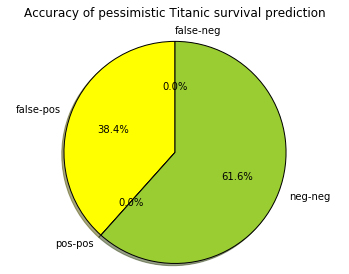

In [122]:
import matplotlib.pyplot as plt
# To inline plots in the notebook, we specified %matplotlib inline at the top of the page

labels = ['false-neg', 'false-pos', 'pos-pos', 'neg-neg']
slice_sizes = [results[(0,1)], results[(1,0)], results[(1,1)],  results[(0,0)]]
colors = ['blue', 'yellow', 'mediumpurple', 'yellowgreen']

plt.pie(slice_sizes, labels=labels,autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title("Accuracy of pessimistic Titanic survival prediction", y=1.09)
plt.axis('equal')

### A different predictor function: defining a decision tree

In [123]:
def my_predictor(row): 
    if row['Embarked'] == 'C':
        return 1
    else:
        return 0
    
# Construct the prediction using this new predictor
plist = map ( lambda row: my_predictor(row), titanic_table )

# Repeat the accuracy code
zipped = zip ( ground_truth_list, plist )  # [(0,0), (1,0), ...]

results = { (0,0): 0, (0,1): 0, (1,0):0, (1,1):0 }  
reduce( update_case, zipped, results ) 
print ( "Results:", results )

accuracy = (results[(0,0)] + results[(1,1)]) / float (len(titanic_table))
print ( "Accuracy:", accuracy )

('Results:', {(0, 1): 75, (1, 0): 249, (0, 0): 474, (1, 1): 93})
('Accuracy:', 0.6363636363636364)


(-1.0105683955043732, 1.0089777708130898, -1.0077754774220797, 1.0)

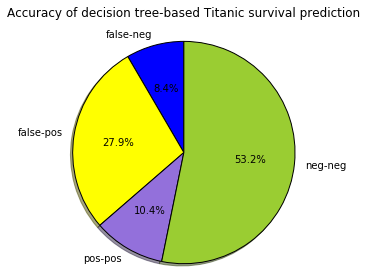

In [124]:
labels = ['false-neg', 'false-pos', 'pos-pos', 'neg-neg']
slice_sizes = [results[(0,1)], results[(1,0)], results[(1,1)],  results[(0,0)]]
plt.pie(slice_sizes, labels=labels,autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title("Accuracy of decision tree-based Titanic survival prediction", y=1.09)
plt.axis('equal')

### Exercise: Write a program to automate the construction of the decision tree predictor.